<center>
    
### Data Wrangling Projects
## Project 1
# Immigration of Canada

Ссылка на исходный датасет на Kaggle: https://www.kaggle.com/mohamedjafirashraf/immigration-of-canada-in-1980-2013

**Личная цель проекта:** 
1. Отточить навыки подготовки данных для разведочного анализа 
1. Отработать и проверить на практике собтсвенный фреймворк по очистке и подготовке данных 

<center>
    
# A. Import Data & Libraries

### Import Libraries
---

In [1]:
# Загрузка библиотек

# Data manipulation
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Downloading/Importing Data
---

In [2]:
# Путь в системе к данным 

data_path = 'F:/Repository GitHub/Trifonov.portfolio.github.io/1. Data Wrangling/Project 1 - Immigration of Canada/Canada.xlsx'

#### Лист 1 - Regions by Citizenship

In [3]:
# Загрузка данных для визуального анализа 

# Игнорируется первые 19 сторок при чтении файла
dataset_sheet_1_0 = pd.read_excel(data_path, sheet_name='Regions by Citizenship', skiprows=19)
dataset_sheet_1_0.head(2)

,Classification,Unnamed: 1,Regional aggregates,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,Type,Coverage,AreaName,RegName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013.0
1,Immigrants,Citizens,Northern America,Northern America,..,..,..,..,..,..,...,..,..,..,..,..,..,..,1,1,NaN


In [4]:
# Игнорируется первые 20 сторок при чтении файла
dataset_sheet_1_1 = pd.read_excel(data_path, sheet_name='Regions by Citizenship', skiprows=20)
dataset_sheet_1_1.head(2)

,Type,Coverage,AreaName,RegName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Citizens,Northern America,Northern America,..,..,..,..,..,..,...,..,..,..,..,..,..,..,1,1,NaN
1,Immigrants,Foreigners,Africa,Eastern Africa,1471,1641,1426,1094,1187,1134,...,7726,7083,6750,6669,6705,6922,8591,8956,8846,NaN


В исходной таблице столбцы Classification и Regional aggregates являются состовными, каждый из них содержит еще по два столбца. 

- Classification
    - Type
    - Coverage
    
- Regional aggregates
    - AreaName
    - RegName

Что приводит к смещению стороки и тому, что следующая строка с перечеслением годов остается безимянной. Так же есть пробелы в названии. 

Решение: переиминовать первые четыре столбца: 

- Classification_Type
- Classification_Coverage
- Regional_aggregates_AreaName
- Regional_aggregates_RegName

In [5]:
# Перименование столбцов

dataset_sheet_1 = dataset_sheet_1_1.rename(columns=
                                           {'Type' : 'Classification_Type',
                                            'Coverage' : 'Classification_Coverage',
                                            'AreaName' : 'Regional_aggregates_AreaName',
                                            'RegName' : 'Regional_aggregates_RegName'})

In [6]:
dataset_sheet_1.head()

,Classification_Type,Classification_Coverage,Regional_aggregates_AreaName,Regional_aggregates_RegName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Citizens,Northern America,Northern America,..,..,..,..,..,..,...,..,..,..,..,..,..,..,1,1,NaN
1,Immigrants,Foreigners,Africa,Eastern Africa,1471,1641,1426,1094,1187,1134,...,7726,7083,6750,6669,6705,6922,8591,8956,8846,NaN
2,Immigrants,Foreigners,Africa,Middle Africa,33,27,44,32,42,30,...,2452,2802,2834,2951,3034,3255,3369,3146,4602,NaN
3,Immigrants,Foreigners,Africa,Northern Africa,1100,1268,1348,936,842,840,...,12478,11323,12705,11750,13456,16320,19271,15712,15453,NaN
4,Immigrants,Foreigners,Africa,Southern Africa,1041,1126,791,387,297,327,...,1203,1012,1148,1230,1184,1235,1306,1049,1348,NaN


In [7]:
dataset_sheet_1.tail()

,Classification_Type,Classification_Coverage,Regional_aggregates_AreaName,Regional_aggregates_RegName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
24,Immigrants,Foreigners,Oceania,Melanesia,632,707,816,558,391,448,...,497,300,278,304,331,313,401,316,273,NaN
25,Immigrants,Foreigners,Oceania,Micronesia,1,..,..,1,..,..,...,1,2,1,3,1,2,..,..,2,NaN
26,Immigrants,Foreigners,Oceania,Polynesia,5,13,11,2,6,5,...,10,4,1,3,4,7,10,6,5,NaN
27,Immigrants,Foreigners,Oceania Total,NaN,1942,1839,1675,1018,878,920,...,1788,1585,1473,1693,1834,1860,1834,1548,1679,NaN
28,Immigrants,Foreigners,Unknown,Unknown,44000,18078,16904,13635,14855,14368,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,NaN


#### Лист 2 - Canada by Citizenship

In [8]:
# Игнорируется первые 19 сторок при чтении файла
dataset_sheet_2_0 = pd.read_excel(data_path, sheet_name='Canada by Citizenship', skiprows=19)
dataset_sheet_2_0.head(2)

,Classification,Unnamed: 1,Origin/Destination,Major area,Unnamed: 4,Region,Unnamed: 6,Development region,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
1,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004


In [9]:
# Загрузка данных для визуального анализа 

# Игнорируется первые 20 сторок при чтении файла
dataset_sheet_2_1 = pd.read_excel(data_path, sheet_name='Canada by Citizenship', skiprows=20)
dataset_sheet_2_1.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


На листе 2 ситуация аналогичная листу 1, объеденны следующие колонки:

- Classification
    - Type
    - Coverage
- Origin/Destination
    - OdName
- Major area
    - AREA
    - AreaName
- Region
    - REG
    - RegName
- Development region
    - DEV
    - DevName
    
Присутствуют не корентные для обработки в pandas имена. 


Решение: переиминовать столбцы. 

- Classification_Type
- Classification_Coverage
- Origin_Destination
- Major_area_AREA
- Major area_AreaName
- Region_REG
- Region_RegName
- Development_region_DEV
- Development_region_DevName

In [10]:
dataset_sheet_2 = dataset_sheet_2_1.rename(columns=
                                           {'Type' : 'Classification_Type',
                                            'Coverage' : 'Classification_Coverage',
                                            'OdName' : 'Origin_Destination',
                                            'AREA' : 'Major_area_AREA',
                                            'AreaName' : 'Major area_AreaName',
                                            'REG' : 'Region_REG',
                                            'RegName' : 'Region_RegName',
                                            'DEV' : 'Development_region_DEV',
                                            'DevName' : 'Development_region_DevName'
                                           })

In [11]:
dataset_sheet_2.head()

,Classification_Type,Classification_Coverage,Origin_Destination,Major_area_AREA,Major area_AreaName,Region_REG,Region_RegName,Development_region_DEV,Development_region_DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [12]:
dataset_sheet_2.tail()

,Classification_Type,Classification_Coverage,Origin_Destination,Major_area_AREA,Major area_AreaName,Region_REG,Region_RegName,Development_region_DEV,Development_region_DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407
195,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,44000,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484
196,Immigrants,Both,Total,999,World,999,World,999,World,143137,...,235822,262242,251640,236753,247244,252170,280687,248748,257903,259021


#### Лист 3 - Canada by Citizenship (2)

In [13]:
dataset_sheet_3 = pd.read_excel(data_path, sheet_name='Canada by Citizenship (2)')
dataset_sheet_3.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Для сохранения наименования столбцов переименуем солбцы в третьем листе, аналогично второму.

In [14]:
dataset_sheet_3 = dataset_sheet_3.rename(columns=
                                           {'Type' : 'Classification_Type',
                                            'Coverage' : 'Classification_Coverage',
                                            'OdName' : 'Origin_Destination',
                                            'AREA' : 'Major_area_AREA',
                                            'AreaName' : 'Major area_AreaName',
                                            'REG' : 'Region_REG',
                                            'RegName' : 'Region_RegName',
                                            'DEV' : 'Development_region_DEV',
                                            'DevName' : 'Development_region_DevName'
                                           })

In [15]:
dataset_sheet_3.head()

,Classification_Type,Classification_Coverage,Origin_Destination,Major_area_AREA,Major area_AreaName,Region_REG,Region_RegName,Development_region_DEV,Development_region_DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [16]:
dataset_sheet_3.tail()

,Classification_Type,Classification_Coverage,Origin_Destination,Major_area_AREA,Major area_AreaName,Region_REG,Region_RegName,Development_region_DEV,Development_region_DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407
195,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,44000,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484


#### Слияние листов 2 и 3 

Листы 2 и 3 отражают одну и ту же информацию, что видно как из названия самих листов, так и из содержания таблиц. Их целе сообразно свести в одну общую таблицу. 

In [17]:
dataset_sheets_2_and_3=pd.concat([dataset_sheet_2, dataset_sheet_3], ignore_index=True)

In [18]:
dataset_sheets_2_and_3.head()

,Classification_Type,Classification_Coverage,Origin_Destination,Major_area_AREA,Major area_AreaName,Region_REG,Region_RegName,Development_region_DEV,Development_region_DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [19]:
dataset_sheets_2_and_3.tail()

,Classification_Type,Classification_Coverage,Origin_Destination,Major_area_AREA,Major area_AreaName,Region_REG,Region_RegName,Development_region_DEV,Development_region_DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
388,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
389,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
390,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
391,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407
392,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,44000,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484


In [20]:
dataset_sheets_2_and_3.index

RangeIndex(start=0, stop=393, step=1)

<center>

# B. Assessing Data

Перед проведением оценки создадим осмысленные названия датафреймов в соостветсвии с названиями листов истходной таблици

In [21]:
regions_by_citizenship = dataset_sheet_1

In [22]:
canada_by_citizenship = dataset_sheets_2_and_3

### Checking Data Quality
---

<center>
    

#### regions_by_citizenship

In [23]:
regions_by_citizenship.head()

,Classification_Type,Classification_Coverage,Regional_aggregates_AreaName,Regional_aggregates_RegName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Citizens,Northern America,Northern America,..,..,..,..,..,..,...,..,..,..,..,..,..,..,1,1,NaN
1,Immigrants,Foreigners,Africa,Eastern Africa,1471,1641,1426,1094,1187,1134,...,7726,7083,6750,6669,6705,6922,8591,8956,8846,NaN
2,Immigrants,Foreigners,Africa,Middle Africa,33,27,44,32,42,30,...,2452,2802,2834,2951,3034,3255,3369,3146,4602,NaN
3,Immigrants,Foreigners,Africa,Northern Africa,1100,1268,1348,936,842,840,...,12478,11323,12705,11750,13456,16320,19271,15712,15453,NaN
4,Immigrants,Foreigners,Africa,Southern Africa,1041,1126,791,387,297,327,...,1203,1012,1148,1230,1184,1235,1306,1049,1348,NaN


In [24]:
regions_by_citizenship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Classification_Type           29 non-null     object 
 1   Classification_Coverage       29 non-null     object 
 2   Regional_aggregates_AreaName  29 non-null     object 
 3   Regional_aggregates_RegName   24 non-null     object 
 4   1980                          29 non-null     object 
 5   1981                          29 non-null     object 
 6   1982                          29 non-null     object 
 7   1983                          29 non-null     object 
 8   1984                          29 non-null     object 
 9   1985                          29 non-null     object 
 10  1986                          29 non-null     object 
 11  1987                          29 non-null     object 
 12  1988                          29 non-null     object 
 13  1989   

In [25]:
regions_by_citizenship.index

RangeIndex(start=0, stop=29, step=1)

<center>
    
#### canada_by_citizenship

In [26]:
canada_by_citizenship.head()

,Classification_Type,Classification_Coverage,Origin_Destination,Major_area_AREA,Major area_AreaName,Region_REG,Region_RegName,Development_region_DEV,Development_region_DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [27]:
canada_by_citizenship.index

RangeIndex(start=0, stop=393, step=1)

### Missing data
---

<center>
    
#### regions_by_citizenship

In [28]:
missing_data = regions_by_citizenship.isnull()
missing_data.head()

,Classification_Type,Classification_Coverage,Regional_aggregates_AreaName,Regional_aggregates_RegName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [29]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")
    

Classification_Type
False    29
Name: Classification_Type, dtype: int64

Classification_Coverage
False    29
Name: Classification_Coverage, dtype: int64

Regional_aggregates_AreaName
False    29
Name: Regional_aggregates_AreaName, dtype: int64

Regional_aggregates_RegName
False    24
True      5
Name: Regional_aggregates_RegName, dtype: int64

1980
False    29
Name: 1980, dtype: int64

1981
False    29
Name: 1981, dtype: int64

1982
False    29
Name: 1982, dtype: int64

1983
False    29
Name: 1983, dtype: int64

1984
False    29
Name: 1984, dtype: int64

1985
False    29
Name: 1985, dtype: int64

1986
False    29
Name: 1986, dtype: int64

1987
False    29
Name: 1987, dtype: int64

1988
False    29
Name: 1988, dtype: int64

1989
False    29
Name: 1989, dtype: int64

1990
False    29
Name: 1990, dtype: int64

1991
False    29
Name: 1991, dtype: int64

1992
False    29
Name: 1992, dtype: int64

1993
False    29
Name: 1993, dtype: int64

1994
False    29
Name: 1994, dtype: int64

1995
Fals

Пропушенные значения: 
- Regional_aggregates_RegName = 5 из 29
- 2013 = 29 - все значения пропущенные. 

In [30]:
# Удаление столбца 2013, где пропущенны все значения 
regions_by_citizenship_drop_missing = regions_by_citizenship.copy()
regions_by_citizenship_drop_missing = regions_by_citizenship_drop_missing.dropna(how='all', axis=1)

In [31]:
regions_by_citizenship_drop_missing.head(2)

,Classification_Type,Classification_Coverage,Regional_aggregates_AreaName,Regional_aggregates_RegName,1980,1981,1982,1983,1984,1985,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Immigrants,Citizens,Northern America,Northern America,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,1,1
1,Immigrants,Foreigners,Africa,Eastern Africa,1471,1641,1426,1094,1187,1134,...,5808,7726,7083,6750,6669,6705,6922,8591,8956,8846


In [32]:
# Заполнение пропущенных занчений в столбце Regional_aggregates_RegName на Unknown 

regions_by_citizenship_drop_missing['Regional_aggregates_RegName'] = regions_by_citizenship_drop_missing['Regional_aggregates_RegName'].fillna('Unknown')

In [33]:
regions_by_citizenship_drop_missing.isnull().sum()

Classification_Type             0
Classification_Coverage         0
Regional_aggregates_AreaName    0
Regional_aggregates_RegName     0
1980                            0
1981                            0
1982                            0
1983                            0
1984                            0
1985                            0
1986                            0
1987                            0
1988                            0
1989                            0
1990                            0
1991                            0
1992                            0
1993                            0
1994                            0
1995                            0
1996                            0
1997                            0
1998                            0
1999                            0
2000                            0
2001                            0
2002                            0
2003                            0
2004                            0
2005          

Пропущенные значения в столбце 2013 удалены вместе со столбцом, в столбце Regional_aggregates_RegName пропущенные значения заменены на Unknown

<center>
    

#### canada_by_citizenship

In [34]:
missing_data = canada_by_citizenship.isnull()
missing_data.head()

,Classification_Type,Classification_Coverage,Origin_Destination,Major_area_AREA,Major area_AreaName,Region_REG,Region_RegName,Development_region_DEV,Development_region_DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Classification_Type
False    393
Name: Classification_Type, dtype: int64

Classification_Coverage
False    393
Name: Classification_Coverage, dtype: int64

Origin_Destination
False    393
Name: Origin_Destination, dtype: int64

Major_area_AREA
False    393
Name: Major_area_AREA, dtype: int64

Major area_AreaName
False    393
Name: Major area_AreaName, dtype: int64

Region_REG
False    393
Name: Region_REG, dtype: int64

Region_RegName
False    393
Name: Region_RegName, dtype: int64

Development_region_DEV
False    393
Name: Development_region_DEV, dtype: int64

Development_region_DevName
False    393
Name: Development_region_DevName, dtype: int64

1980
False    393
Name: 1980, dtype: int64

1981
False    393
Name: 1981, dtype: int64

1982
False    393
Name: 1982, dtype: int64

1983
False    393
Name: 1983, dtype: int64

1984
False    393
Name: 1984, dtype: int64

1985
False    393
Name: 1985, dtype: int64

1986
False    393
Name: 1986, dtype: int64

1987
False    393
Name: 1987, dtype:

In [36]:
canada_by_citizenship.isnull().sum()

Classification_Type           0
Classification_Coverage       0
Origin_Destination            0
Major_area_AREA               0
Major area_AreaName           0
Region_REG                    0
Region_RegName                0
Development_region_DEV        0
Development_region_DevName    0
1980                          0
1981                          0
1982                          0
1983                          0
1984                          0
1985                          0
1986                          0
1987                          0
1988                          0
1989                          0
1990                          0
1991                          0
1992                          0
1993                          0
1994                          0
1995                          0
1996                          0
1997                          0
1998                          0
1999                          0
2000                          0
2001                          0
2002    

В таблице canada_by_citizenship пропущенных значений нет.

### Duplicates
------

<center>
    
#### regions_by_citizenship

In [37]:
regions_by_citizenship_drop_missing.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
dtype: bool

<center>

#### canada_by_citizenship

In [38]:
canada_by_citizenship.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
388     True
389     True
390     True
391     True
392     True
Length: 393, dtype: bool

In [39]:
canada_by_citizenship_drop_dup = canada_by_citizenship.drop_duplicates()

In [40]:
canada_by_citizenship.head(2)

,Classification_Type,Classification_Coverage,Origin_Destination,Major_area_AREA,Major area_AreaName,Region_REG,Region_RegName,Development_region_DEV,Development_region_DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


### Analysis of variable types
---

<center>
    
#### regions_by_citizenship

In [41]:
regions_by_citizenship_drop_missing.head(2)

,Classification_Type,Classification_Coverage,Regional_aggregates_AreaName,Regional_aggregates_RegName,1980,1981,1982,1983,1984,1985,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Immigrants,Citizens,Northern America,Northern America,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,1,1
1,Immigrants,Foreigners,Africa,Eastern Africa,1471,1641,1426,1094,1187,1134,...,5808,7726,7083,6750,6669,6705,6922,8591,8956,8846


In [42]:
regions_by_citizenship_drop_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Classification_Type           29 non-null     object
 1   Classification_Coverage       29 non-null     object
 2   Regional_aggregates_AreaName  29 non-null     object
 3   Regional_aggregates_RegName   29 non-null     object
 4   1980                          29 non-null     object
 5   1981                          29 non-null     object
 6   1982                          29 non-null     object
 7   1983                          29 non-null     object
 8   1984                          29 non-null     object
 9   1985                          29 non-null     object
 10  1986                          29 non-null     object
 11  1987                          29 non-null     object
 12  1988                          29 non-null     object
 13  1989                  

Категориальные перменнные: 
- Classification_Type 
- Classification_Coverage       
- Regional_aggregates_AreaName
- Regional_aggregates_RegName

Дискретные числовые перменные: 
Года с 1980 по 2012. При этом не все значения числами.

In [43]:
regions_by_citizenship_drop_missing.columns.tolist()

['Classification_Type',
 'Classification_Coverage',
 'Regional_aggregates_AreaName',
 'Regional_aggregates_RegName',
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012]

In [44]:
regions_by_citizenship_cat = regions_by_citizenship_drop_missing[['Classification_Type',
                                                                 'Classification_Coverage', 
                                                                 'Regional_aggregates_AreaName',
                                                                 'Regional_aggregates_RegName']].astype('category')

In [45]:
regions_by_citizenship_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Classification_Type           29 non-null     category
 1   Classification_Coverage       29 non-null     category
 2   Regional_aggregates_AreaName  29 non-null     category
 3   Regional_aggregates_RegName   29 non-null     category
dtypes: category(4)
memory usage: 1.6 KB


In [46]:
regions_by_citizenship_num = regions_by_citizenship_drop_missing[[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012]]

In [47]:
regions_by_citizenship_num[1980].unique()

array(['..', 1471, 33, 1100, 1041, 306, 3951, 6836, 8693, 11315, 4181,
       31025, 1467, 23721, 7762, 6810, 39760, 7045, 734, 5302, 13081,
       9378, 1304, 632, 1, 5, 1942, 44000], dtype=object)

In [48]:
regions_by_citizenship_num.isin(['..']).sum()

1980    2
1981    3
1982    3
1983    2
1984    3
1985    3
1986    3
1987    3
1988    2
1989    2
1990    2
1991    2
1992    1
1993    0
1994    1
1995    0
1996    0
1997    2
1998    1
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    2
2011    1
2012    0
dtype: int64

In [49]:
regions_by_citizenship_num = regions_by_citizenship_num.replace({'..': 0})

In [50]:
regions_by_citizenship_num.isin(['..']).sum()

1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
dtype: int64

In [51]:
regions_by_citizenship_num = regions_by_citizenship_num.astype('int32')

In [52]:
regions_by_citizenship_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1980    29 non-null     int32
 1   1981    29 non-null     int32
 2   1982    29 non-null     int32
 3   1983    29 non-null     int32
 4   1984    29 non-null     int32
 5   1985    29 non-null     int32
 6   1986    29 non-null     int32
 7   1987    29 non-null     int32
 8   1988    29 non-null     int32
 9   1989    29 non-null     int32
 10  1990    29 non-null     int32
 11  1991    29 non-null     int32
 12  1992    29 non-null     int32
 13  1993    29 non-null     int32
 14  1994    29 non-null     int32
 15  1995    29 non-null     int32
 16  1996    29 non-null     int32
 17  1997    29 non-null     int32
 18  1998    29 non-null     int32
 19  1999    29 non-null     int32
 20  2000    29 non-null     int32
 21  2001    29 non-null     int32
 22  2002    29 non-null     int32
 23  2003    29 non-nu

In [53]:
regions_by_citizenship = pd.concat([regions_by_citizenship_cat, regions_by_citizenship_num], axis=1)
regions_by_citizenship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Classification_Type           29 non-null     category
 1   Classification_Coverage       29 non-null     category
 2   Regional_aggregates_AreaName  29 non-null     category
 3   Regional_aggregates_RegName   29 non-null     category
 4   1980                          29 non-null     int32   
 5   1981                          29 non-null     int32   
 6   1982                          29 non-null     int32   
 7   1983                          29 non-null     int32   
 8   1984                          29 non-null     int32   
 9   1985                          29 non-null     int32   
 10  1986                          29 non-null     int32   
 11  1987                          29 non-null     int32   
 12  1988                          29 non-null     int32 

<center>

#### canada_by_citizenship

In [54]:
canada_by_citizenship_drop_dup.head(2)

,Classification_Type,Classification_Coverage,Origin_Destination,Major_area_AREA,Major area_AreaName,Region_REG,Region_RegName,Development_region_DEV,Development_region_DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


In [55]:
canada_by_citizenship_drop_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Classification_Type         197 non-null    object
 1   Classification_Coverage     197 non-null    object
 2   Origin_Destination          197 non-null    object
 3   Major_area_AREA             197 non-null    int64 
 4   Major area_AreaName         197 non-null    object
 5   Region_REG                  197 non-null    int64 
 6   Region_RegName              197 non-null    object
 7   Development_region_DEV      197 non-null    int64 
 8   Development_region_DevName  197 non-null    object
 9   1980                        197 non-null    int64 
 10  1981                        197 non-null    int64 
 11  1982                        197 non-null    int64 
 12  1983                        197 non-null    int64 
 13  1984                        197 non-null    int64 

Категориальные перменнные:

- Classification_Type
- Classification_Coverage
- Origin_Destination
- Major area_AreaName
- Region_RegName 
- Development_region_DevName

In [56]:
canada_by_citizenship_drop_dup.columns.tolist()

['Classification_Type',
 'Classification_Coverage',
 'Origin_Destination',
 'Major_area_AREA',
 'Major area_AreaName',
 'Region_REG',
 'Region_RegName',
 'Development_region_DEV',
 'Development_region_DevName',
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [57]:
canada_by_citizenship_cut = canada_by_citizenship_drop_dup[['Classification_Type',
                                                        'Classification_Coverage',
                                                        'Origin_Destination',
                                                        'Major area_AreaName',
                                                        'Region_RegName',
                                                        'Development_region_DevName']].astype('category')
canada_by_citizenship_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Classification_Type         197 non-null    category
 1   Classification_Coverage     197 non-null    category
 2   Origin_Destination          197 non-null    category
 3   Major area_AreaName         197 non-null    category
 4   Region_RegName              197 non-null    category
 5   Development_region_DevName  197 non-null    category
dtypes: category(6)
memory usage: 10.9 KB


In [62]:
canada_by_citizenship_num = canada_by_citizenship_drop_dup[['Major_area_AREA',
                                                           'Region_REG',
                                                           'Development_region_DEV', 
                                                           1980,
                                                           1981,
                                                           1982,
                                                           1983,
                                                           1984,
                                                           1985,
                                                           1986,
                                                           1987,
                                                           1988,
                                                           1989,
                                                           1990,
                                                           1991,
                                                           1992,
                                                           1993,
                                                           1994,
                                                           1995,
                                                           1996,
                                                           1997,
                                                           1998,
                                                           1999,
                                                           2000,
                                                           2001,
                                                           2002,
                                                           2003,
                                                           2004,
                                                           2005,
                                                           2006,
                                                           2007,
                                                           2008,
                                                           2009,
                                                           2010,
                                                           2011,
                                                           2012,
                                                           2013]]
canada_by_citizenship_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Major_area_AREA         197 non-null    int64
 1   Region_REG              197 non-null    int64
 2   Development_region_DEV  197 non-null    int64
 3   1980                    197 non-null    int64
 4   1981                    197 non-null    int64
 5   1982                    197 non-null    int64
 6   1983                    197 non-null    int64
 7   1984                    197 non-null    int64
 8   1985                    197 non-null    int64
 9   1986                    197 non-null    int64
 10  1987                    197 non-null    int64
 11  1988                    197 non-null    int64
 12  1989                    197 non-null    int64
 13  1990                    197 non-null    int64
 14  1991                    197 non-null    int64
 15  1992                   

In [64]:
canada_by_citizenship = pd.concat([canada_by_citizenship_cut, canada_by_citizenship_num], axis=1)
canada_by_citizenship = canada_by_citizenship[['Classification_Type',
                                               'Classification_Coverage',
                                               'Origin_Destination',
                                               'Major_area_AREA',
                                               'Major area_AreaName',
                                               'Region_REG',
                                               'Region_RegName',
                                               'Development_region_DEV',
                                               'Development_region_DevName',
                                               1980,
                                               1981,
                                               1982,
                                               1983,
                                               1984,
                                               1985,
                                               1986,
                                               1987,
                                               1988,
                                               1989,
                                               1990,
                                               1991,
                                               1992,
                                               1993,
                                               1994,
                                               1995,
                                               1996,
                                               1997,
                                               1998,
                                               1999,
                                               2000,
                                               2001,
                                               2002,
                                               2003,
                                               2004,
                                               2005,
                                               2006,
                                               2007,
                                               2008,
                                               2009,
                                               2010,
                                               2011,
                                               2012,
                                               2013]]
canada_by_citizenship.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Classification_Type         197 non-null    category
 1   Classification_Coverage     197 non-null    category
 2   Origin_Destination          197 non-null    category
 3   Major_area_AREA             197 non-null    int64   
 4   Major area_AreaName         197 non-null    category
 5   Region_REG                  197 non-null    int64   
 6   Region_RegName              197 non-null    category
 7   Development_region_DEV      197 non-null    int64   
 8   Development_region_DevName  197 non-null    category
 9   1980                        197 non-null    int64   
 10  1981                        197 non-null    int64   
 11  1982                        197 non-null    int64   
 12  1983                        197 non-null    int64   
 13  1984                

### Detecting and Filtering Outliers

*** 

In [ ]:
# regions_by_citizenship
# canada_by_citizenship

 <center>

#### regions_by_citizenship

In [79]:
regions_by_citizenship.head()

,Classification_Type,Classification_Coverage,Regional_aggregates_AreaName,Regional_aggregates_RegName,1980,1981,1982,1983,1984,1985,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Immigrants,Citizens,Northern America,Northern America,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,Immigrants,Foreigners,Africa,Eastern Africa,1471,1641,1426,1094,1187,1134,...,5808,7726,7083,6750,6669,6705,6922,8591,8956,8846
2,Immigrants,Foreigners,Africa,Middle Africa,33,27,44,32,42,30,...,1929,2452,2802,2834,2951,3034,3255,3369,3146,4602
3,Immigrants,Foreigners,Africa,Northern Africa,1100,1268,1348,936,842,840,...,11355,12478,11323,12705,11750,13456,16320,19271,15712,15453
4,Immigrants,Foreigners,Africa,Southern Africa,1041,1126,791,387,297,327,...,1258,1203,1012,1148,1230,1184,1235,1306,1049,1348


In [65]:
regions_by_citizenship.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,8030.896552,7902.551724,7461.103448,5435.689655,5345.793103,5095.896552,6149.137931,9625.551724,10152.482759,12041.103448,...,14934.586207,15893.620690,17631.206897,16864.965517,15851.551724,16555.206897,16963.551724,18948.310345,16802.241379,17456.310345
std,11819.613927,10879.179035,10024.889552,6844.198174,6958.694363,6370.029644,7563.933476,12247.667850,13756.155603,15886.474223,...,26430.792010,27012.099223,31693.499842,29597.762718,26325.955852,27445.302941,27738.787911,32133.374185,28732.156158,30018.783873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,734.000000,921.000000,816.000000,457.000000,391.000000,448.000000,532.000000,1200.000000,656.000000,790.000000,...,1800.000000,1788.000000,1585.000000,1473.000000,1693.000000,1834.000000,1860.000000,1834.000000,1548.000000,1679.000000
50%,3951.000000,4363.000000,4120.000000,3083.000000,2882.000000,2979.000000,3782.000000,6804.000000,5887.000000,6790.000000,...,5808.000000,6990.000000,7083.000000,6750.000000,7826.000000,8862.000000,8847.000000,8591.000000,7415.000000,7891.000000
75%,8693.000000,9191.000000,9022.000000,7100.000000,6661.000000,6543.000000,7801.000000,10735.000000,11499.000000,18671.000000,...,16803.000000,18056.000000,16724.000000,14541.000000,13886.000000,14719.000000,16320.000000,19271.000000,16799.000000,15453.000000
max,44000.000000,44802.000000,42720.000000,24696.000000,27274.000000,23850.000000,28739.000000,46698.000000,54726.000000,60893.000000,...,131769.000000,134850.000000,159253.000000,149054.000000,133459.000000,139894.000000,141434.000000,163845.000000,146894.000000,152218.000000


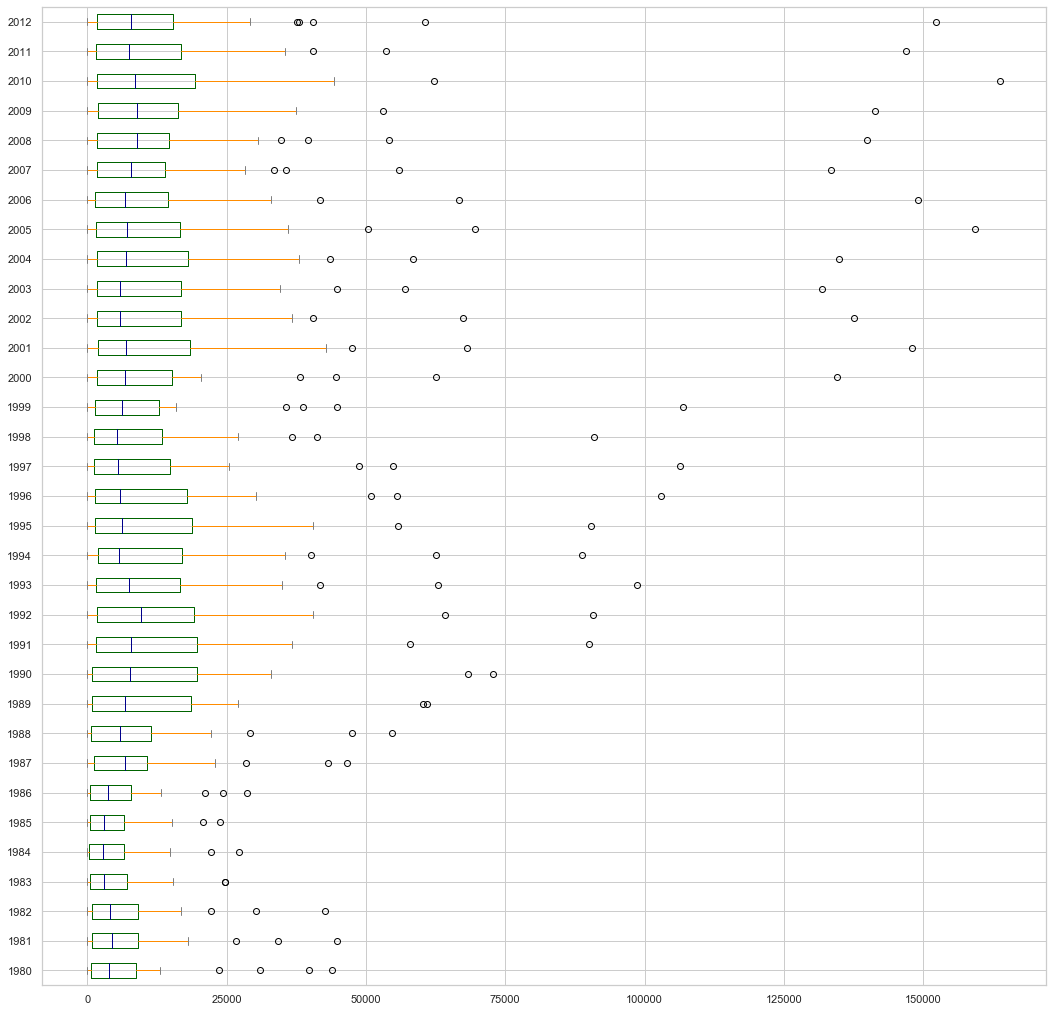

In [125]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
regions_by_citizenship.boxplot(vert=False, color=color, figsize=(18, 18))

In [153]:
import plotly.express as px
px.box(regions_by_citizenship_num)

In [172]:
for c in regions_by_citizenship_cat:
    print(regions_by_citizenship_cat[c].sort_values().unique())
    print('')

[Immigrants]
Categories (1, object): [Immigrants]

[Citizens, Foreigners]
Categories (2, object): [Citizens, Foreigners]

[Africa, Africa Total, Asia, Asia Total, Europe, ..., Latin America and the Caribbean Total, Northern America, Oceania, Oceania Total, Unknown]
Length: 12
Categories (12, object): [Africa, Africa Total, Asia, Asia Total, ..., Northern America, Oceania, Oceania Total, Unknown]

[Australia and New Zealand, Caribbean, Central America, Central Asia, Eastern Africa, ..., Southern Europe, Unknown, Western Africa, Western Asia, Western Europe]
Length: 23
Categories (23, object): [Australia and New Zealand, Caribbean, Central America, Central Asia, ..., Unknown, Western Africa, Western Asia, Western Europe]

